# Setup

In [1]:
# import packages
%run ../global_packages.py

# get the global parameters
%run ../global_pars.py

# import your local functions
sys.path.insert(1, '../')
from global_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

# Paths

In [2]:
figpath = '../figures/'

# Get Data

In [3]:
# SLA
ds_SLA = xr.open_dataset('../data_processing/2_SLA/sla_processed.nc')
ds_SLA

<xarray.Dataset>
Dimensions:           (day_time: 10013, lat: 138, loc_list: 6, lon: 216, month: 12, no_stations: 505, time: 329)
Coordinates:
  * lon               (lon) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat               (lat) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * time              (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * day_time          (day_time) datetime64[ns] 1993-01-01 ... 2020-05-31
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * no_stations       (no_stations) float64 1.0 2.0 3.0 ... 503.0 504.0 505.0
  * loc_list          (loc_list) int64 0 75 225 294 415 504
Data variables:
    daily_sla         (day_time, lat, lon) float64 ...
    mon_sla           (time, lat, lon) float64 ...
    mon_sla_mon_clim  (month, lat, lon) float64 ...
    mon_sla_mon_anom  (time, lat, lon) float64 ...
    sta_loninds       (no_stations) int64 ...
    sta_latinds       (no_stations) int64 ...
    sta_lon           (no_sta

In [4]:
mon_sla = ds_SLA['mon_sla']
mon_sla_mon_anom = ds_SLA['mon_sla_mon_anom']
mon_sla_mon_clim = ds_SLA['mon_sla_mon_clim']
lat = mon_sla.lat.values
lon = mon_sla.lon.values

# Get DMI

In [5]:
# load DMI data
ds_DMI= xr.open_dataset('../data_processing/3_DMI/dmi_processed.nc')

posIODyears = list(np.array(ds_DMI.pos_IOD_years))
negIODyears = list(np.array(ds_DMI.neg_IOD_years)) 
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) 

sposIODyears = list(np.array(ds_DMI.spos_IOD_years)) 
snegIODyears = list(np.array(ds_DMI.sneg_IOD_years)) 

wposIODyears = list(np.array(ds_DMI.wpos_IOD_years)) 
wnegIODyears = list(np.array(ds_DMI.wneg_IOD_years)) 

ds_DMI

<xarray.Dataset>
Dimensions:          (negyears: 10, neuyears: 40, posyears: 13, snegyears: 6, sposyears: 6, time: 747, wnegyears: 4, wposyears: 7)
Coordinates:
  * time             (time) datetime64[ns] 1958-03-01 1958-04-01 ... 2020-05-01
  * posyears         (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
  * negyears         (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
  * neuyears         (neuyears) int64 1958 1959 1962 1965 ... 2014 2017 2020
  * sposyears        (sposyears) int64 1961 1972 1994 1997 2006 2019
  * snegyears        (snegyears) int64 1960 1964 1970 1996 1998 2016
  * wposyears        (wposyears) int64 1963 1967 1977 1982 2012 2015 2018
  * wnegyears        (wnegyears) int64 1971 1975 1992 2010
Data variables:
    dmi              (time) float64 ...
    dmi_3mo_runmean  (time) float64 ...
    pos_IOD_years    (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
    neg_IOD_years    (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
    neu

# Group Anomalies Into IOD Phases

In [6]:
var = mon_sla_mon_anom
# ------------------------------------------------------------#
# Anomaly
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
posIOD_mon_sla_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,posIODyears)

# average over the negative IOD years -------------------------------------------# 
negIOD_mon_sla_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,negIODyears)

# average over the neutral IOD years -------------------------------------------# 
neuIOD_mon_sla_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,neuIODyears)

# ------------------------------------------------------------#
# Strong Anomaly
# ------------------------------------------------------------#
    
# average over the strong positive IOD years -------------------------------------------# 
sposIOD_mon_sla_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,sposIODyears)

# average over the strong negative IOD years -------------------------------------------# 
snegIOD_mon_sla_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,snegIODyears)


# ------------------------------------------------------------#
# Weak Anomaly
# ------------------------------------------------------------#
    
# average over the weak positive IOD years -------------------------------------------# 
wposIOD_mon_sla_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,wposIODyears)

# average over the weak negative IOD years -------------------------------------------# 
wnegIOD_mon_sla_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,wnegIODyears)


# ------------------------------------------------------------#
# Annual Cycle
# ------------------------------------------------------------#
mon_sla_mon_clim = mon_sla_mon_clim.roll(month=-5,roll_coords = False)

/home/jennap/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


# Hovmueller Diagrams

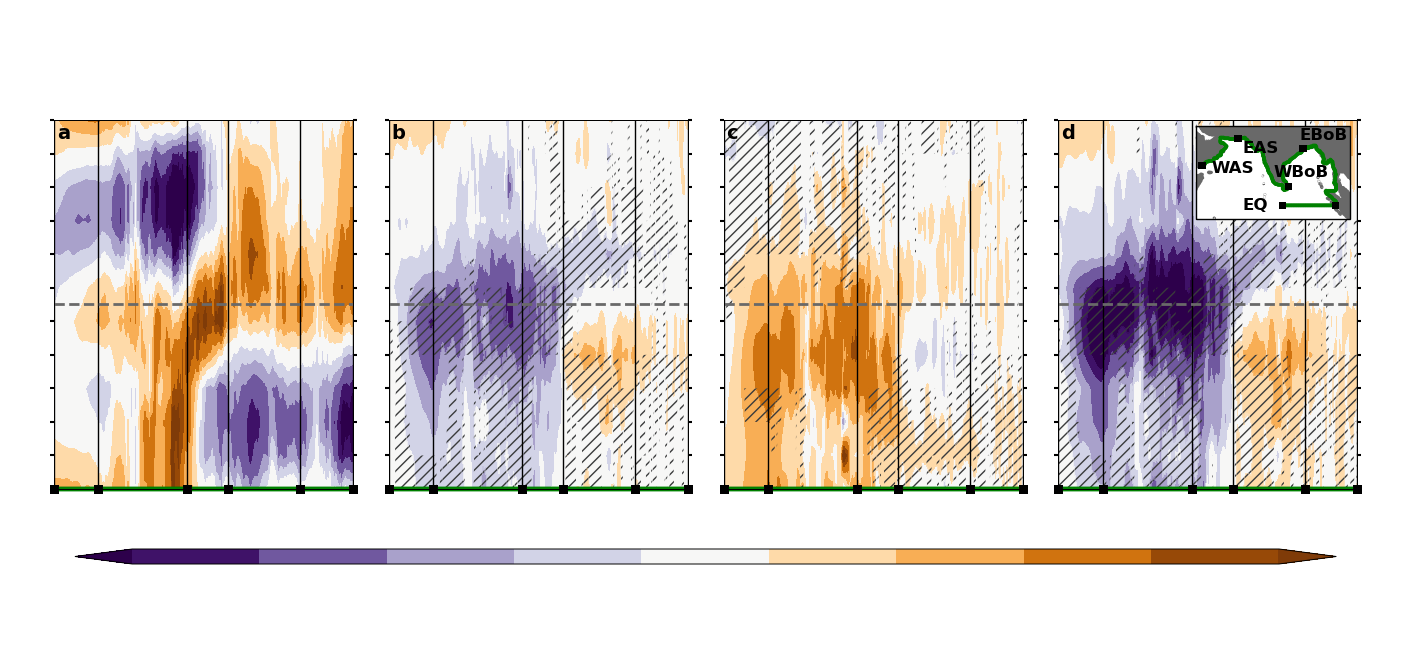

In [22]:
# create list of integer years
IODphases = list([mon_sla_mon_clim,posIOD_mon_sla_mon_anom,
                  negIOD_mon_sla_mon_anom,sposIOD_mon_sla_mon_anom])
# titles = ['Monthly\nClimatology','Interannual Anomaly\nPositive IOD Phases',
#           'Interannual Anomaly\nNegative IOD Phases','Interannual Anomaly\nStrong Positive Phases']
titles = ['Seasonal','Pos IODs','Neg IODs', 'Strong\nPos IODs']
# plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(17.8/2.54, 3), dpi = 200)

cmin = -0.15
cmax = 0.15

letters = ['a','b','c','d','e','f']

params = {'legend.fontsize': 6,
         'axes.labelsize': 8,
         'axes.titlesize': 8,
         'xtick.labelsize':6.15,
         'ytick.labelsize':7.5,
         'hatch.linewidth':0.5,
         'hatch.color':'#3A3B3C',
         'axes.linewidth':0.35,
         'xtick.major.width':0,
         'xtick.major.size':1.5,
         'ytick.major.width':0.75,
         'ytick.major.size':1.5}

pylab.rcParams.update(params)

#########################

for ii,phase in enumerate(IODphases):
    
    # Get times and make array of datetime objects
    vtimes = phase.month
    
    data = np.zeros([vtimes.shape[0],ds_SLA.sta_loninds.shape[0]])
    ac = np.zeros([vtimes.shape[0],ds_SLA.sta_loninds.shape[0]])
    
    for jj in range(ds_SLA.sta_loninds.shape[0]):
        data[:,jj] = phase[:,ds_SLA.sta_latinds[jj],ds_SLA.sta_loninds[jj]]
        ac[:,jj] = mon_sla_mon_clim[:,ds_SLA.sta_latinds[jj],ds_SLA.sta_loninds[jj]]

    # colorbar limits
    levels = np.round(np.linspace(cmin, cmax, 10),2)

    # Specify longitude values for chosen domain
    sta = np.arange(len(ds_SLA.sta_loninds))

    ax = fig.add_subplot(1,4,ii+1)

    # Plot of chosen variable averaged over latitude and slightly smoothed
#     cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")

    cf = ax.contourf(sta,vtimes,data,levels = levels,cmap=plt.cm.PuOr_r, extend="both")
    
    if ii >0:
        ss = np.ma.array(data, mask= np.sign(ac) * np.sign(data)>=0) # maintains opposite condition
        css = ax.contourf(sta,vtimes,ss,levels = levels,cmap=plt.cm.PuOr_r,
                          extend="both", hatches=['//////'], alpha=0.5)
    
    for loc in ds_SLA.loc_list:
        plt.axvline(x=loc,color = 'k', linewidth = 0.5)
        plt.plot(ds_SLA.loc_list,np.full(ds_SLA.loc_list.shape,1), markersize = 2,
                 markerfacecolor = 'k', marker = 's', color = 'g',markeredgecolor = 'k',
                 clip_on=False)
        
        
#     plt.xlabel('Station')
#     if ii == 0:
#         plt.ylabel('Month')
    
    plt.title(titles[ii], fontsize = 16,c='w')
    
    ax2 = ax.twinx()
    
#     if ii == 0:
#         ax.set_yticklabels(['','','','','summer/fall','','','','', '', '','winter/spring'])
#     else:
#         ax.set_yticklabels([])
        
#     plt.yticks(rotation=90)
        
#     if ii == 3:
#         ax2.set_yticks(np.arange(1,13))
#         ax2.set_yticklabels(['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar', 'Apr', 'May'])
#     else:
#         ax2.set_yticklabels([])  

    
    if ii == 3:
        ax2.set_yticks(np.arange(0,12))
        ax2.set_yticklabels(['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar', 'Apr', 'May'],
                           fontsize = 6,c='w')
    else:
        ax2.set_yticks(np.arange(0,12))
        ax2.set_yticklabels([])
    
    if ii == 0:
        ax.set_yticks(np.arange(1,13))
        ax.set_yticklabels(['',' ',' ','','','Summer/Fall    ','','','', '', '','Winter/Spring    '], 
                           rotation = 90,c='w')
    else:
        ax.set_yticks(np.arange(1,13))
        ax.set_yticklabels([])
    
        
    ax.axhline(y = 6.5, color = 'dimgray',linestyle = '--', linewidth = 1)
    xticks = (np.array(ds_SLA.loc_list[:-1]) + np.array(ds_SLA.loc_list[1:]))*0.5
    ax.set_xticks(xticks)
    ax.set_xticklabels(['EQ', 'EBoB','WBoB', 'EAS','WAS'],c='w')
    ax.tick_params(axis='x', which='major', pad=5)
#     ax.set_yticks(list(np.arange(0,12)))
    cf.set_clim(cmin, cmax)# reset lims because contourf does weird things.
    add_letter(ax, letters[ii], x = 0.01,y=0.95, fontsize = 7)

    
# add coasta waveguide inset
left, bottom, width, height = [0.845, 0.715, 0.11, 0.155]
axi = fig.add_axes([left, bottom, width, height],projection= ccrs.PlateCarree())
axi.scatter(ds_SLA.sta_lon,ds_SLA.sta_lat,s=7,marker = '.',c='g', 
               edgecolor = 'none',transform=ccrs.PlateCarree(), zorder = 3)
axi.scatter(ds_SLA.sta_lon[ds_SLA.loc_list],ds_SLA.sta_lat[ds_SLA.loc_list],s=7,
               edgecolor = 'none',marker = 's',c='k',transform=ccrs.PlateCarree(), zorder = 3)
g = add_land(axi, bounds = [49,104,-5,30], lcolor = 'dimgray')
g.xlocator = mticker.FixedLocator([])
g.ylocator = mticker.FixedLocator([])

add_text(axi, 'WAS', x = 0.1,y=0.5, fontsize = 6, color = 'k', weight = 'bold')
add_text(axi, 'EAS', x = 0.3,y=0.71, fontsize = 6, color = 'k', weight = 'bold')
add_text(axi, 'WBoB', x = 0.5,y=0.46, fontsize = 6, color = 'k', weight = 'bold')
add_text(axi, 'EBoB', x = 0.67,y=0.85, fontsize = 6, color = 'k', weight = 'bold')
add_text(axi, 'EQ', x = 0.3,y=0.1, fontsize = 6, color = 'k', weight = 'bold')



# cbar_ax = fig.add_axes([0.91, 0.125, 0.015, 0.75])
cbar_ax = fig.add_axes([0.045, 0.14, 0.9, 0.025])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04, orientation = 'horizontal')
cbar.set_label('Sea-level Anomaly ($m$)', size = 14, c='w')
cbar.ax.set_xticklabels([-0.15,-0.12,-0.08,-0.05,-0.02,0.02,0.05,0.08,0.12,0.15],c='w')
plt.subplots_adjust(wspace = 0.12, bottom = 0.265, left = 0.03, right = 0.96)